# KAGGLE: House Prices Explarotary Data Analysis

Takim olarak, Kaggle'daki meshur projelerden birisi olan 'House Prices' veri seti uzerinde Kesifci Veri Analizi (EDA) uygulayacagiz.

Bu proje, detaylı bir Keşifsel Veri Analizi (EDA) gerçekleştirerek başlayacak ve ardından veri ön işleme adımlarını tamamlayarak veri setimizi makine öğrenmesi modellemesi için hazırlayacak bir takım projesidir.

Projeyle ilgili daha detayli bilgi icin Kaggle sayfasina linkten ulasabilirsiniz. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

#### __Proje kapsaminda yapilacak bir takim gorevler:__

* Veri on inceleme
* Eksik verilerle basa cikilmasi  -  nur - seda       
* Outlierlar ile basa cikilmasi  -  fatih              
* Feature Engineering (Ozellik muhendisligi) -     busra + zubeyde + fatih
* Istatistiksel analizler ve veri gorsellestirme  - seda nur 
* Encoding     -- burak
* Standardizasyon ve Normalizasyon -- burak
* High - Low Cardinality tespit edilmesi - tuba 
* Multicollinearity tespit edilmesi   - tuba
* Logarithmic Donusum (Log Transormation)  - fatih
* Github uzerinden takimca calisma becerileri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('house_prices_reduced.csv')

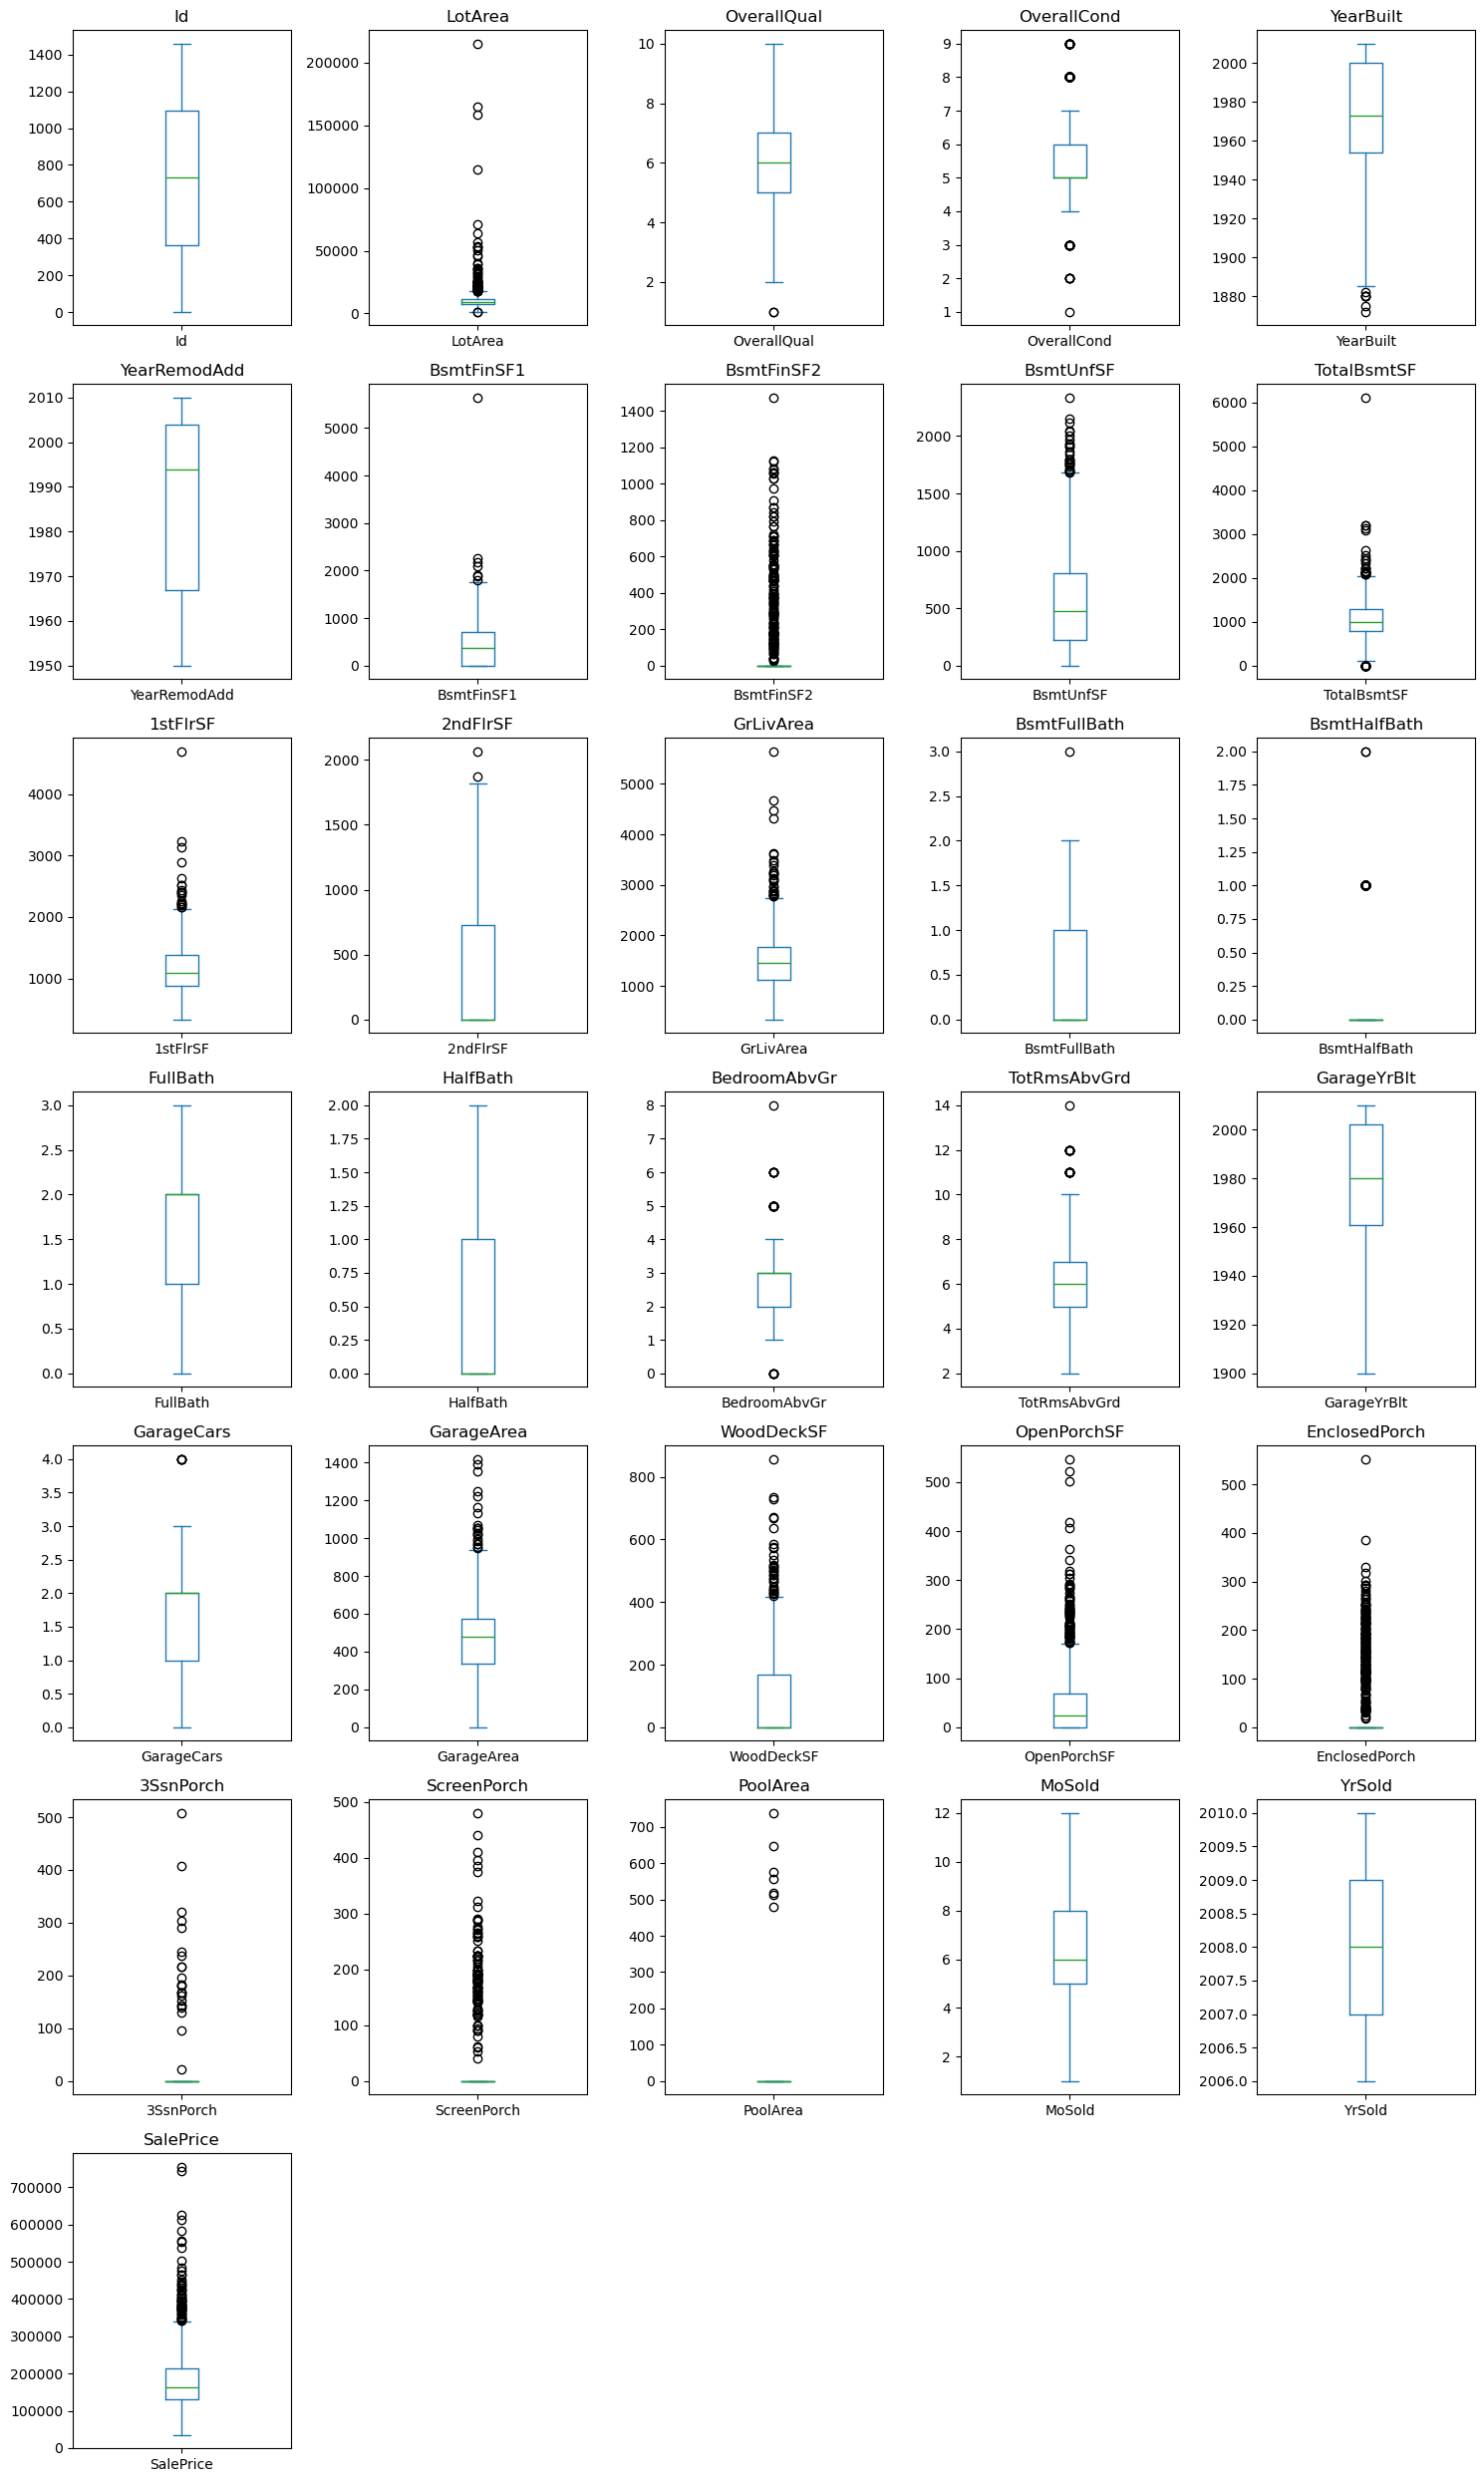

In [24]:
numeric_df =df1.select_dtypes(include='number')

fig, axes = plt.subplots(7, 5, figsize=(15, 25))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(numeric_df.columns):
    numeric_df[col].plot.box(ax=axes[i])
    axes[i].set_title(col)

# Hide any remaining empty subplots
for i in range(len(numeric_df.columns), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


In [46]:
def plot_dtl_hist(df, column_name, percentile_1, percentile_2):
    # Calculate statistics
    mean = df[column_name].mean()
    std = df[column_name].std()
    skewness = df[column_name].skew()
    percentiles = df[column_name].quantile([percentile_1, percentile_2])

    # Create histogram
    plt.figure(figsize=(15, 4))
    sns.histplot(df[column_name], kde=True)

    # Add vertical dashed lines at specified percentiles
    plt.axvline(x=percentiles[percentile_1], color='r', linestyle='--', label=f'{percentile_1*100}th percentile')
    plt.axvline(x=percentiles[percentile_2], color='g', linestyle='--', label=f'{percentile_2*100}th percentile')

    # Add text annotations
    plt.text(0.7, 0.9, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
    plt.text(0.7, 0.8, f'Standard Deviation: {std:.2f}', transform=plt.gca().transAxes)
    plt.text(0.7, 0.7, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes)

    # Set plot title and labels
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

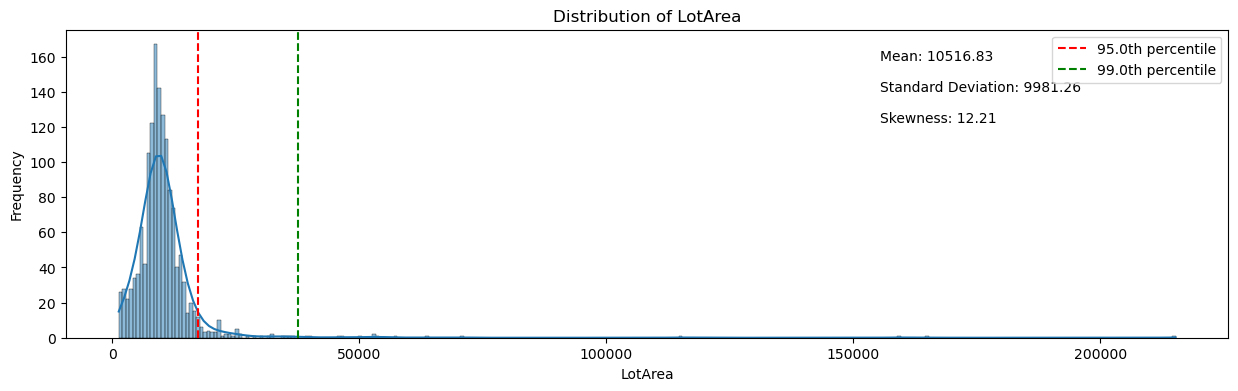

In [47]:
plot_dtl_hist(df1, 'LotArea', .95, .99)

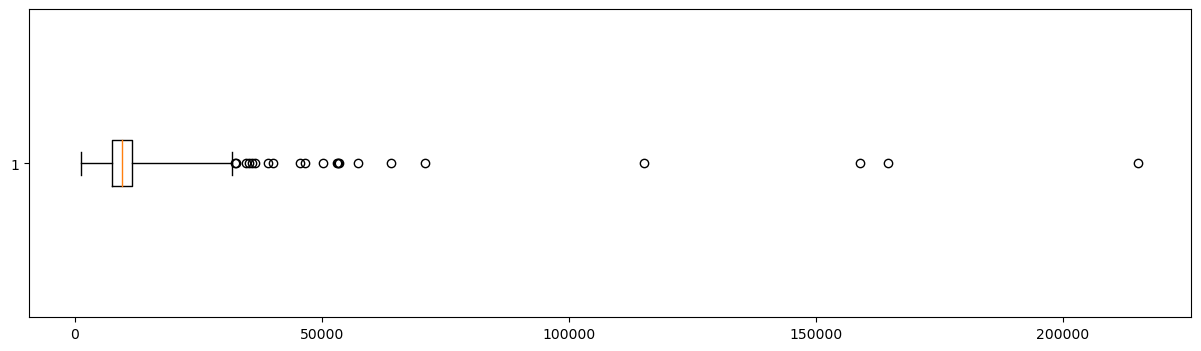

In [56]:
fig, axes = plt.subplots(figsize=(15,4))
axes.boxplot(df1.LotArea, vert=False, whis=5);

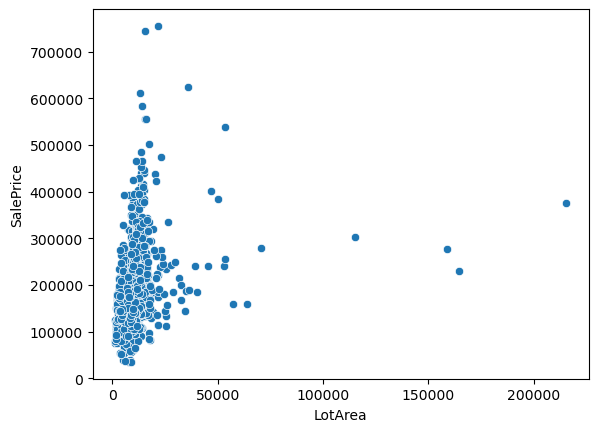

In [59]:
sns.scatterplot(data=df1, x='LotArea', y='SalePrice');

__DEALING WITH OUTLIERS__

1. 1-5 or 0-10 type numeric columns are not having outliers. Even if most of the data are between lets say 4-7, we will not assume 10 is outlier  

2. Some features we can think IQR3 is outliers and some columns we may not accept IQR5 outliers. We need to dive deep to each columns seperately

3. There are different ways to deal with outliers:  
        a. Detect and Remove them (Detection with zscore or IQR)
        b. Winsorization
        


Handling outliers in a dataset is an important step in data preprocessing. Here are different ways to deal with outliers:

Detection and Removal:

Identify outliers using statistical methods (e.g., Z-score, IQR) and remove them from the dataset.
Be cautious when using this approach, as it may lead to loss of information.
Winsorization:

Winsorizing replaces the extreme values with less extreme values (e.g., by setting them to a specified percentile value).
Imputation:

Replace outliers with a reasonable estimate. For example, you can use the mean, median, or mode.
Binning or Discretization:

Group values into bins or categories, which can help reduce the impact of outliers.
Transformations:

Apply mathematical transformations (e.g., log transformation, square root) to make the distribution more normal and reduce the impact of outliers.
Use Robust Models:

Some models, like Random Forests or Decision Trees, are less sensitive to outliers compared to linear models.
Capping:

Cap or clip the extreme values to a specified percentile. For example, you can set any value above the 99th percentile to the value at the 99th percentile.
Create a Separate Category:

For categorical variables, you can create a separate category for outliers.
Feature Engineering:

Create new features that may be more robust to outliers. For example, creating ratios or proportions.
Domain Knowledge:

Leverage your domain knowledge to determine if certain values are valid or outliers.
Use Anomaly Detection Techniques:

Algorithms like Isolation Forest, One-Class SVM, or Autoencoders can be used to detect outliers.
Ensemble Models:

Use ensemble methods that combine multiple models. Some ensemble methods, like Random Forests, can handle outliers better.
Evaluate Model Performance:

Assess how your chosen model(s) perform with and without outlier handling techniques. Sometimes, outliers can be important for certain types of analysis.

In [32]:
class Outliers:
    def __init__(self, df, IQR_multi=3):
        self.df = df
        self.IQR_multi = IQR_multi

    def _get_outliers(self, col):
        Q1, Q3 = self.df[col].quantile([.25, .75])
        threshold_low = Q1 - self.IQR_multi * abs(Q1 - Q3)
        threshold_high = Q1 + self.IQR_multi * abs(Q1 - Q3)
        return (self.df[col] < threshold_low) | (self.df[col] > threshold_high)

    
    def detect_outlier_rows(self):
        outlier_rows = []
        self.df = self.df.select_dtypes(include='number')
        for col in self.df.columns:
            Q1, Q3 = self.df[col].quantile([.25, .75])
            threshold_low = Q1 - self.IQR_multi * abs(Q1-Q3)
            threshold_high = Q1 + self.IQR_multi * abs(Q1-Q3)
            is_outlier_exist = (self.df[col] < threshold_low) | (self.df[col] > threshold_high)
            outliers = self.df[is_outlier_exist]
            if not outliers.empty:
                outlier_rows.extend(outliers.index)
        outlier_rows = list(set(outlier_rows))  # Remove duplicates
        return self.df.iloc[outlier_rows]


    def detect_outlier_columns(self):
        outlier_features = []
        numeric_cols = self.df.select_dtypes(include='number').columns
        for col in numeric_cols:
            if self._get_outliers(col).any():
                outlier_features.append(col)
        return outlier_features

    def outlier_stats(self):
        outlier_stats = {'Feature': [], 'Negative Outliers': [], 'Positive Outliers': []}
        numeric_cols = self.df.select_dtypes(include='number').columns
        for col in numeric_cols:
            is_outlier = self._get_outliers(col)
            if is_outlier.any():
                outlier_stats['Feature'].append(col)
                outlier_stats['Negative Outliers'].append((is_outlier & (self.df[col] < self.df[col].median())).sum())
                outlier_stats['Positive Outliers'].append((is_outlier & (self.df[col] > self.df[col].median())).sum())
        return pd.DataFrame(outlier_stats)

In [41]:
outlier_handler = Outliers(df1, 3)

In [45]:
outlier_handler.outlier_stats()

,Feature,Negative Outliers,Positive Outliers
0,LotArea,0,54
1,OverallCond,1,22
2,BsmtFinSF1,0,3
3,BsmtFinSF2,0,167
4,BsmtUnfSF,0,6
5,TotalBsmtSF,0,11
6,1stFlrSF,0,9
7,GrLivArea,0,18
8,BsmtHalfBath,0,82
9,BedroomAbvGr,0,8


In [60]:
df1['LotArea'].corr(df1['SalePrice'])

0.26384335387140556

In [65]:
df1['sqmLotPrice'] = df1['SalePrice'] / df1['LotArea']

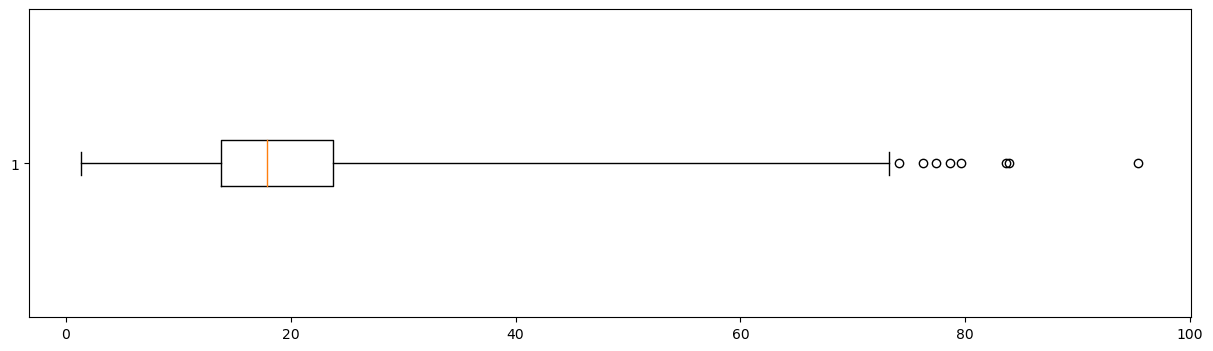

In [68]:
fig, axes = plt.subplots(figsize=(15,4))
axes.boxplot(df1.sqmLotPrice, vert=False, whis=5);

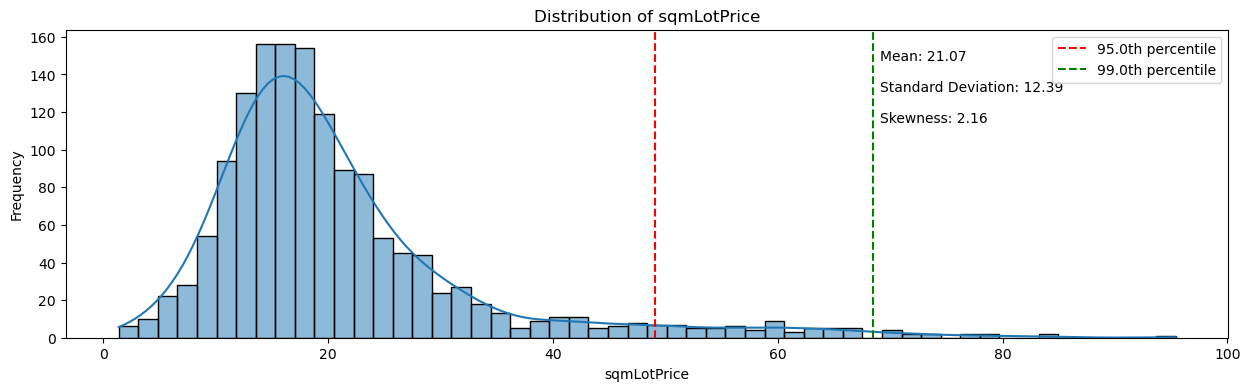

In [72]:
plot_dtl_hist(df1, 'sqmLotPrice', .95, .99)

In [74]:
outlier_handler=Outliers(df1, 5)

In [75]:
outlier_handler.outlier_stats()

,Feature,Negative Outliers,Positive Outliers
0,LotArea,0,24
1,BsmtFinSF1,0,1
2,BsmtFinSF2,0,167
3,TotalBsmtSF,0,1
4,1stFlrSF,0,1
5,GrLivArea,0,3
6,BsmtHalfBath,0,82
7,BedroomAbvGr,0,1
8,WoodDeckSF,0,1
9,OpenPorchSF,0,7


In [88]:
percentiles_lot_area = df1['LotArea'].quantile([.01, .99])

In [96]:
percentiles_lot_area

0.01     1680.00
0.99    37567.64
Name: LotArea, dtype: float64

In [95]:
df1[df1['LotArea'] > percentiles_lot_area[.99]][['Neighborhood', 'OverallQual', 'OverallCond', 'LotArea', 'SalePrice']]

,Neighborhood,OverallQual,OverallCond,LotArea,SalePrice
53,Veenker,9,5,50271,385000
249,ClearCr,6,7,159000,277000
271,ClearCr,7,7,39104,241500
313,Timber,7,5,215245,375000
335,Timber,5,6,164660,228950
384,ClearCr,6,5,53107,240000
451,ClearCr,7,5,70761,280000
457,ClearCr,4,6,53227,256000
523,Edwards,10,5,40094,184750
661,NoRidge,8,7,46589,402000
